## k-Nearest Neighbors (k-NN) and Random Forest

In this notebook, we'll explore two different classification algorithms:
- **k-Nearest Neighbors (k-NN)**: A non-parametric, instance-based learning algorithm that classifies data points based on the majority class of its nearest neighbors.
- **Random Forest**: An ensemble learning method that builds multiple decision trees and averages their predictions to create a robust classification model.

We'll generate synthetic data, train both models, and visualize their decision boundaries to see how they differ in terms of classification behavior.


k-NN Accuracy: 0.85
Confusion Matrix:
 [[16  3]
 [ 3 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.86      0.86      0.86        21

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



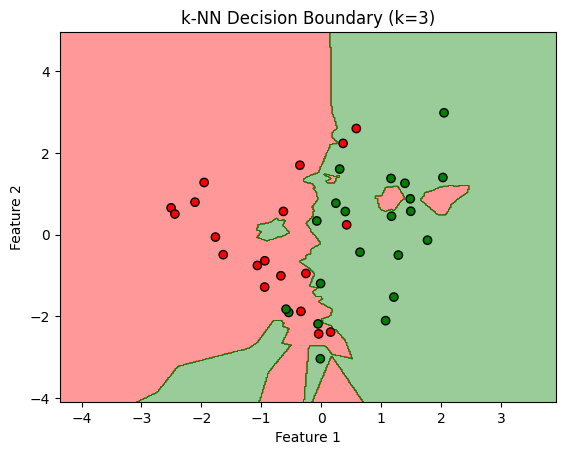

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Generating synthetic 2D data for visualization
X_knn, y_knn = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Splitting the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Creating the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors
knn.fit(X_train_knn, y_train_knn)

# Making predictions
y_pred_knn = knn.predict(X_test_knn)

# Evaluating the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)

print("k-NN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_report(y_test_knn, y_pred_knn))

# Visualizing the decision boundary
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_test_knn[:, 0], X_test_knn[:, 1], c=y_test_knn, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))
plt.title('k-NN Decision Boundary (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### k-Nearest Neighbors (k-NN) Results:

- **Accuracy**: The proportion of correctly predicted test samples.
- **Confusion Matrix**: Shows the number of correct and incorrect predictions for each class.
- **Classification Report**: Includes precision, recall, F1-score, and support for each class.

In the decision boundary plot, we can observe how k-NN makes decisions based on local neighborhoods. The boundary is jagged because it is highly influenced by the nearest training points.


Random Forest Accuracy: 0.85
Confusion Matrix:
 [[15  4]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.83      0.90      0.86        21

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



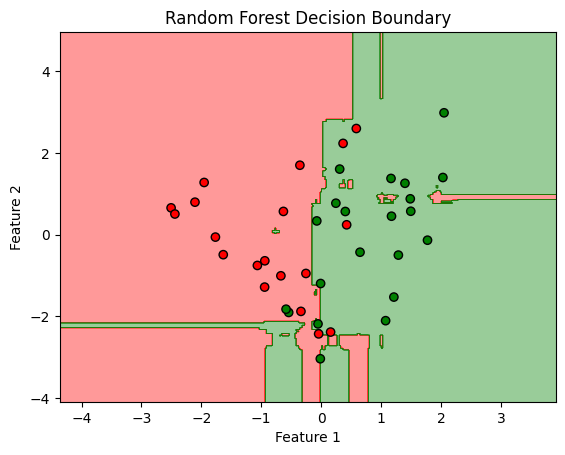

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Generating synthetic 2D data for visualization
X_rf, y_rf = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Splitting the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Creating the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_rf, y_train_rf)

# Making predictions
y_pred_rf = rf_clf.predict(X_test_rf)

# Evaluating the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

# Visualizing the decision boundary
x_min, x_max = X_rf[:, 0].min() - 1, X_rf[:, 0].max() + 1
y_min, y_max = X_rf[:, 1].min() - 1, X_rf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_test_rf[:, 0], X_test_rf[:, 1], c=y_test_rf, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green')))
plt.title('Random Forest Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Random Forest Results:

- **Accuracy**: Measures how well the Random Forest model performed on the test data.
- **Confusion Matrix**: Shows the correct and incorrect classifications for each class.
- **Classification Report**: Includes metrics such as precision, recall, and F1-score for each class.

In the decision boundary plot, the Random Forest model creates smoother boundaries due to the averaging of multiple decision trees. This helps in reducing overfitting and making more general predictions.


### Key Differences:

- **k-NN**:
  - The decision boundary is highly localized and sensitive to the nearby points in the training set. It can result in a jagged and less generalized decision boundary.
  
- **Random Forest**:
  - Builds an ensemble of decision trees, and the final decision boundary is smoother and more generalized, thanks to the averaging effect. This reduces the risk of overfitting compared to individual trees.
